In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N_feeds = 256
d = 0.3048 #NS
d2 = 22.0  #EW 
cspeed = 3e8               
R2D = 180./np.pi
D2R = np.pi/180.
FREQ = 450.


EW offset being simulated: [3, 5, 7, 9, 10]
theta (EW offset)= 3 deg; blob separation= 260.5859375 MHz
theta (EW offset)= 5 deg; blob separation= 156.4453125 MHz
theta (EW offset)= 7 deg; blob separation= 111.875 MHz
theta (EW offset)= 9 deg; blob separation= 87.1484375 MHz
theta (EW offset)= 10 deg; blob separation= 78.515625 MHz


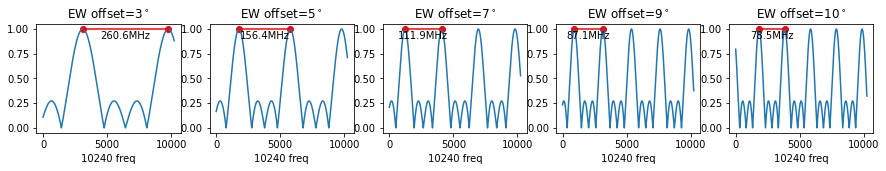

In [16]:
#Python EW beamform
EWangles = [0.0]
nfreq = 10240  #Oversampling in number of channels to make sure we capture the blob separation

#Coefficients to E-W beamform at zenith is just [1+0j]

#Simultated signal along EW, for a number of EW angles, only at meridian (ZA=0)
factor = np.zeros((nfreq,N_feeds),dtype=complex)

#source = [1.5,2.1,3.1,3.5,4.2,5.1,6.1,7,7.5,8]  #this is the full range used. 
source = [3,5,7,9,10] #this is just to visualize 5 E-W angles below
print("EW offset being simulated:", source)
sep_blob = np.zeros(len(source))

fig = plt.figure(figsize=[15,2])
#Generate fake signals

for bb in range(len(source)): 
    THETA = source[bb]
    Signals = np.zeros((nfreq,4),dtype=complex) #4 EW inputs
    Beam = np.zeros(nfreq) #Brute-force formed beam by combining 4 EW inputs
    for m in range(4):
        distance_offset =  np.sin( THETA *D2R)* (d2*m)   
        for f in range(nfreq):
            FREQ = 400+float(400/float(nfreq))*f
            phase_angle =  np.pi * 2 * (FREQ*1.e6) / cspeed * distance_offset
            Signals[f,m] = np.cos(phase_angle)+np.sin(phase_angle)*1j

    for f in range(nfreq):
        REAL = (Signals[f,0].real + Signals[f,1].real + Signals[f,2].real + Signals[f,3].real )/4.
        IMAG = (- Signals[f,0].imag - Signals[f,1].imag - Signals[f,2].imag- Signals[f,3].imag)/4.
        Beam[f] = np.sqrt(REAL**2 + IMAG**2)

    ax = fig.add_subplot(1,len(source),bb+1)
    ax.plot(Beam,label="1")

    #Find the index of the first two blobs
    idx = np.sort((-Beam).argsort()[:bb+2])
    peak2 = idx[0]
    peak1 = idx[1]
    
    ax.scatter(peak1,Beam[peak1],c='r')
    ax.scatter(peak2,Beam[peak2],c='r')
    ax.plot((peak1,peak2),(Beam[peak1],Beam[peak2]),c='r')
    freqdiff = ((peak1-peak2)*400/float(nfreq))
    ax.text(np.mean([peak1,peak2]),0.9,str(round(freqdiff,1))+"MHz",ha="center")
    sep_blob[bb]  = freqdiff

    plt.title("EW offset="+str(round(source[bb],1))+"$^\circ$")
    ax.set_xlabel(str(nfreq)+" freq")
    print("theta (EW offset)=", source[bb], "deg; blob separation=", freqdiff, "MHz")